<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1 核心元件
![3-1](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/3-1.png?raw=true)  
* 層(layers)：組成一個神經網路模型
* 輸入資料(input data) 與 目標(target)：用來訓練及檢測一個神經網路
* 損失函數(loss functions)：取得學習的回饋信號
* 優化器(optimizer)：決定學習進行的方式

## 層(layers)
|向量資料|儲存的張量|使用的層|
|---|---|---|
|1D|2D|densely-connected layer 密集連接層
|2D|3D|recurrent layer 循環層
|3D|4D|Conv2D 2D卷積層  
  
須包含一層batch 維度，因此在儲存時的維度較訓練資料多一維

## 模型
神經網路拓樸定義了一個**假設空間(hypothesis space，只在該神經網路拓樸下權重參數所有可能的組態)**

## 損失函數 (loss function)
* 二元分類問題：二元交叉熵(binary crossentropy)
* 多類別分類問題：分類交叉熵(categorical crossentropy)
* 迴歸問題：均方差(meansquared error)
* 序列學習問題：連結時序問題(connectionist temporal classfication)


# 3-4 二元分類：電影評論為正評或負評
[IMDb,Internet Movie Database](https://www.imdb.com)

載入IMBD資料集

In [47]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### num_words
表示讀取資料時，只允許「單字對應數字的字典」中編號0~9999的單字載入

In [48]:
max([max(sequence) for sequence in train_data])

9999

將數字還原成文字

In [49]:
word_index = imdb.get_word_index() #取得單字對應數字的字典
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()] #反轉為數字對應單字的字典
)

In [50]:
decord_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decord_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 準備資料
方法一：
1. 填補資料中每個子list的內容，使它們具有相同的長度
2. 在將整筆資料轉換成shape (樣本數、填補後的樣本長度)
3. 輸入到崁入層(Embedding layer)
  
方法二： 
1. 對資料中每個子list做[One-shot編碼](https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter19.ipynb#scrollTo=QzUQbu-DtfQa)，將其轉換成由0與1組成的向量

```python
def one_hot_encode(i:int,num_labels:int=10)->List[float]:
  return [1.0 if j==i else 0.0 for j in range(num_labels)]
```
2. 輸入到可處理浮點數的密集層(Dense layer)


In [51]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequences in enumerate(sequences):
    results[i,sequences] = 1.
  return results

### 將訓練資料轉換為維度為10000的向量

In [52]:
x_train = vectorize_sequences(train_data) # 將訓練資料向量化

In [53]:
x_test = vectorize_sequences(test_data)

In [54]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### 將標籤資料向量化

In [55]:
y_train = np.array(train_labels).astype('float32')

In [56]:
y_test = np.array(test_labels).astype('float32')

## 建立神經網路

### 建立密集層Dense堆疊結構，需確認的關鍵：
* 需要使用多少層?
* 每一層要有多少個神經元?

In [63]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

編譯模型

In [58]:
model.compile(optimizer='rmsprop',
       loss='binary_crossentropy', # 指定損失函數，並進行compile
       metrics=['accuracy'])

調整優化器

In [59]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), #調整優化器參數lr的值
       loss='binary_crossentropy',
       metrics=['accuracy'])

使用自行定義的損失函數與metrics函數

In [60]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), #調整優化器參數lr的值
       loss=losses.binary_crossentropy, # 自行指定其他的損失函數與metrics函數
       metrics=[metrics.binary_accuracy])

## 設定驗證資料集  
從原始訓練資料中分離出10000樣本來建立驗證資料集

In [61]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 訓練模型

In [64]:
model.compile(optimizer='rmsprop', #調整優化器參數lr的值
       loss='binary_crossentropy', # 自行指定其他的損失函數與metrics函數
       metrics=['acc'])

history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val,y_val))

# model.fit()會回傳一個history的物件


Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5920 - acc: 0.7091 - val_loss: 0.3998 - val_acc: 0.8532
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3249 - acc: 0.9029 - val_loss: 0.3215 - val_acc: 0.8757
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2308 - acc: 0.9267 - val_loss: 0.2848 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1829 - acc: 0.9400 - val_loss: 0.2836 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1459 - acc: 0.9545 - val_loss: 0.2806 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1175 - acc: 0.9678 - val_loss: 0.2942 - val_acc: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0931 - acc: 0.9761 - val_loss: 0.3211 - val_acc: 0.8785
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0798 - a

In [65]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

繪製訓練與驗證的損失函數

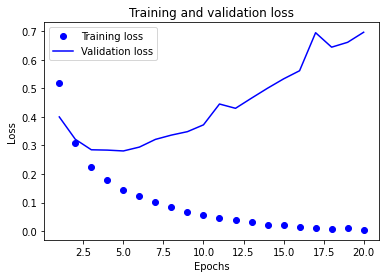

In [68]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

繪製訓練與驗證的準確度

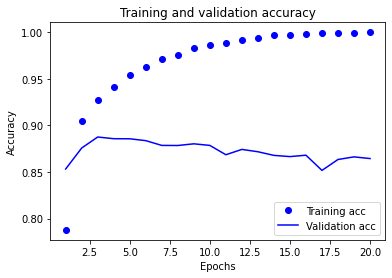

In [69]:
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

驗證準確度在第四個周期後，準確度就下降  
發生**過度適配(Overfitting)**

## 重新建立訓練模型
為了防止過度適配，將訓練週期限制在第四個周期後即結束訓練

In [72]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', #調整優化器參數lr的值
       loss='binary_crossentropy', # 自行指定其他的損失函數與metrics函數
       metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5467 - accuracy: 0.7440
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2617 - accuracy: 0.9132
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1952 - accuracy: 0.9323
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3080 - accuracy: 0.8796


In [73]:
results

[0.3079909682273865, 0.8795599937438965]

將準確度提升到88%準確度

## 使用神經網路對新資料進行預測

In [74]:
model.predict(x_test)

array([[0.17738503],
       [0.9999119 ],
       [0.68613863],
       ...,
       [0.07587335],
       [0.06009609],
       [0.7102694 ]], dtype=float32)

# 3-5 多元分類：數位新聞專欄

# 3-6 迴歸：預測房價